# Ciencia de datos aplicada

## Taller 4

### Contexto

The goal for this analysis was to look for relationships between socioeconomic status and cancer by way of combining data from disparate open sources. I hypothesized that poorer regions would have fewer trials, and higher per capita cancer incidence and death rates.

[contributors-wanted](https://data.world/nrippner/cancer-trials). Comment in the discussion thread or 'request invite' under contributor tab if you're interested. I'd also love to hear if you have any ideas for moving this project forward or in new directions.

This analysis Joins data from clinicaltrials.gov, cancer.gov & census.gov to examine cancer trials, mortality, incidence and demographics.

### Objetivos
1. Preparar los datos para el modelado.
2. Utilizar técnicas de validación para el ajuste de hiperparámetros.
3. Construir un modelo con regresión Lasso.
4. Construir un modelo con regresión Ridge.
5. Evaluar el modelo.
6. Determinar importancia de variables.


In [40]:
#Librería de manejo de datos
import pandas as pd
# Manejo de json
import json

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Grid search para obtener los mejores hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 


# Para la creación de modelo Ridge
from sklearn.linear_model import Ridge
# Para la creación de modelo Lasso
from sklearn.linear_model import Lasso

#Preprocesar
from sklearn import preprocessing

# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 


# Librerías para gráficos
import matplotlib.pyplot as plt


In [22]:
# Se cargan los datos
data=pd.read_csv('cancer_reg.csv',encoding='latin-1',sep=',')

In [23]:
data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [24]:
#Tipos de datos
data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

### 2. Preparación de los datos

Antes de realizar cualquier paso de preparación de datos es importante asegurar que estos no contienen errores, como datos faltantes (missing) o duplicados. Es necesario tratar estas ausencias ya que, en general, los algoritmos de aprendizaje no son robustos ante ellas. 

In [78]:
# Es recomendable que todos los pasos de preparación se realicen sobre otro archivo.
data_t = data
# Eliminación data vacía.
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()
#seleccionar variables
variables_seleccionadas=data.select_dtypes(include=["number"]).columns[0:20]
#Se selecciona el subconjunto del dataset
data_t=data_t[variables_seleccionadas]

In [80]:
# Se selecciona la variable objetivo, en este caso "TARGET".
Y=data_t['TARGET_deathRate']
# Del conjunto de datos se elimina la variable "TARGET".
X=data_t.drop(['TARGET_deathRate'], axis=1)

In [28]:
# Transformación máximo mínimo 
mm_scaler = preprocessing.MinMaxScaler()
X_m = mm_scaler.fit_transform(X)
mm_scaler.transform(X)

array([[0.00437815, 0.00478332, 0.22763394, ..., 0.46095718, 0.11570248,
        0.23394495],
       [0.01103712, 0.01420718, 0.25173033, ..., 0.6675063 , 0.40702479,
        0.52140673],
       [0.00133704, 0.00164204, 0.148808  , ..., 0.79596977, 0.29752066,
        0.54892966],
       ...,
       [0.05129687, 0.00285571, 0.28140146, ..., 0.66498741, 0.54132231,
        0.40978593],
       [0.05129687, 0.00306989, 0.28140146, ..., 0.72040302, 0.39669421,
        0.57186544],
       [0.05129687, 0.00321268, 0.28140146, ..., 0.83879093, 0.15495868,
        0.55351682]])

In [29]:
# Trabformación máximo mínimo
scaler = preprocessing.StandardScaler()
X_s = scaler.fit_transform(X)
scaler.transform(X)

array([[-0.25780138, -0.18285363, -0.75564279, ..., -1.1437499 ,
        -1.51908505, -1.36834751],
       [-0.12923388,  0.00365793, -0.40964231, ...,  0.12533169,
         0.27777333,  0.64548592],
       [-0.31651725, -0.24502414, -1.88750607, ...,  0.91463854,
        -0.39764152,  0.83829976],
       ...,
       [ 0.648077  , -0.22100372,  0.01640616, ...,  0.10985509,
         1.10611231, -0.13648131],
       [ 0.648077  , -0.21676482,  0.01640616, ...,  0.45034039,
         0.21405495,  0.99897796],
       [ 0.648077  , -0.21393889,  0.01640616, ...,  1.17774082,
        -1.2769552 ,  0.8704354 ]])

![1*QIWsHyk8SWRZAaMeh5HUYg.png](https://miro.medium.com/max/2880/1*QIWsHyk8SWRZAaMeh5HUYg.png)


(array([2.985e+03, 4.300e+01, 1.300e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.00000e+00, 1.40370e+03, 2.80440e+03, 4.20510e+03, 5.60580e+03,
        7.00650e+03, 8.40720e+03, 9.80790e+03, 1.12086e+04, 1.26093e+04,
        1.40100e+04]),
 <BarContainer object of 10 artists>)

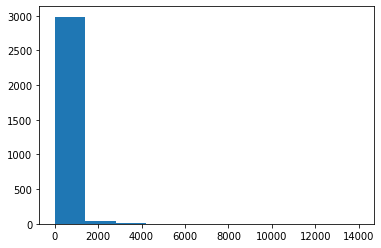

In [31]:
x=data['avgDeathsPerYear']
plt.hist(x)

(array([2.985e+03, 4.300e+01, 1.300e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

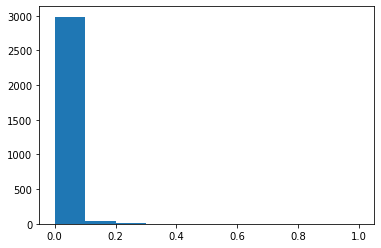

In [33]:
x=data[['avgDeathsPerYear']]
# Transformación máximo mínimo 
mm_scaler = preprocessing.MinMaxScaler()
X_m = mm_scaler.fit_transform(x)
x=mm_scaler.transform(x)

plt.hist(x)

(array([2.985e+03, 4.300e+01, 1.300e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

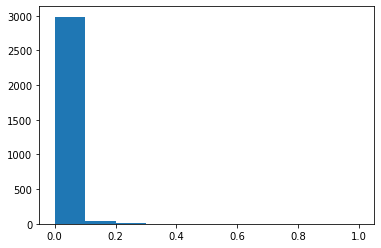

In [35]:
# Trabformación máximo mínimo
scaler = preprocessing.StandardScaler()
X_s = scaler.fit_transform(x)
scaler.transform(x)

plt.hist(x)

### 3. Validación cruzada

Validación cruzada de k-particiones. En este caso el conjunto de entrenamiento se divide en k particiones disjuntas. Luego, se fija un valor de alpha y se toma como conjunto de validación la primera partición y el resto para entrenar el modelo. Este proceso se repite para cada partición. Al finalizar, se determina el valor promedio de las métricas seleccionadas. Este ciclo se repite sobre diferentes valores de alpha y se seleccionan aquel que ofrezca el mejor rendimiento. 

Scikit-learn ofrece algunos métodos que automatizan el proceso de buscar los valores de los hiperparámetros. Uno de ellos es GridSearchCV, el cual se basa en la validación cruzada de k-particiones. Veamos cómo utilizarlo.

In [36]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [37]:
particiones

KFold(n_splits=10, random_state=0, shuffle=True)

![0*W7JGxNLP1Jvlz3Hu.png](https://miro.medium.com/max/700/0*W7JGxNLP1Jvlz3Hu.png)



### 4. Regresión Ridge 
La regresión es una tarea de modelado que implica predecir un valor numérico dado una entrada.

La regresión lineal es el algoritmo estándar para la regresión que asume una relación lineal entre las entradas y la variable objetivo. Una extensión de la regresión lineal invoca la adición de penalizaciones a la función de pérdida durante el entrenamiento que fomenta modelos más simples que tienen valores de coeficientes más pequeños. Estas extensiones se conocen como regresión lineal regularizada o regresión lineal penalizada.

Ridge Regression es un tipo popular de regresión lineal regularizada que incluye una penalización L2. Esto tiene el efecto de reducir los coeficientes para aquellas variables de entrada que no contribuyen mucho a la tarea de predicción.


In [81]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [82]:
# Ahora tenemos que definir el espacio de búsqueda, es decir, los valores de alpha que queremos que sean considerados. 
# Para esto se define un diccionario (o grilla) con los valores que podrá asumir el hiperparámetro alpha.
# Probemos con los siguientes valores:
param_grid = {'alpha': [1,2,5],'normalize':[False,True]}

In [43]:
# Definimos el modelo sin ningún valor del hiperparámetro alpha
modelo_ridge = Ridge()

In [44]:
modelo_ridge

Ridge()

In [56]:
# También puedes indicarle a GridSearch que seleccione el mejor modelo a partir de la búsqueda con base en una métrica 
# particular. Por ejemplo, hubiésemos podido utilizar la siguiente línea de comando:
mejor_modelo_r = GridSearchCV(
    modelo_ridge, # Modelo
    param_grid,  # Parámetros
    cv=particiones,  # Validación
#     scoring = 'r2', # Evaluación del modelo
    n_jobs=-1)

In [57]:
mejor_modelo_r

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 2, 5], 'normalize': [False, True]})

In [58]:
mejor_modelo_r.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 1, 'normalize': True}


### 5. Regresión Lasso
Robert Tibshirani introdujo lasso para mejorar la exactitud de la predicciones e interpretabilidad de los modelo estadísticos de regresión al alterar el proceso de construcción del modelo al seleccionar solamente un subconjunto de (y no todas) las variables provistas para usar en el modelo final.1​ Está basado en el Garrote no negativo de Breiman, que tiene propósitos similares, pero funciona de manera un poco diferente.2​

Antes de lasso, el método más usado para decidir qué variables incluir en un modelo era stepwise selection, que sólo mejora la exactitud de las predicciones en ciertos casos, como cuando sólo unas pocas variables tienen una relación fuerte con la variable independiente. Sin embargo, en otros casos, puede agravar los errores de predicción. Además, en ese momento, ridge regression era la técnica más popular para mejorar la exactitud de las predicciones. Ridge regression mejorar los errores de predicción al reducir en tamaño los coeficientes de regresión que sean demasiado grandes para reducir el sobreajuste (overfitting), pero no realiza selección de variables y por tanto no produce un modelo más interpretable.



In [94]:
param_grid = {'alpha': [0.000001,0.0001,0.1,1],'normalize':[False,True]}

In [95]:
# Para acelerar la convergencia del algoritmo que utiliza Lasso para optimizar la función de costo, utilizaremos la opción
# de normalizar los datos para que todos estén en el mismo rango.
modelo_lasso = Lasso(alpha=1, normalize = 'True')

In [96]:
# También puedes indicarle a GridSearch que seleccione el mejor modelo a partir de la búsqueda con base en una métrica 
# particular. Por ejemplo, hubiésemos podido utilizar la siguiente línea de comando:
mejor_modelo_l = GridSearchCV(modelo_lasso, param_grid, scoring = 'neg_mean_absolute_error',cv=particiones, n_jobs=-1)
mejor_modelo_l.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 2, 'normalize': False}


In [97]:
# También puedes indicarle a GridSearch que seleccione el mejor modelo a partir de la búsqueda con base en una métrica 
# particular. Por ejemplo, hubiésemos podido utilizar la siguiente línea de comando:
mejor_modelo = GridSearchCV(modelo_lasso, param_grid, scoring = 'neg_mean_absolute_error',cv=particiones, n_jobs=-1)
mejor_modelo.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 0.1, 'normalize': True}


### 5. Elección de mejor modelo

¿Cómo determinar qué modelo se adapta mejor a mis datos?

¿Solo miro el cuadrado R, SSE, etc.?

Como la interpretación de ese modelo (cuadrático, raíz, etc.) será muy diferente, ¿no será un problema? 

La segunda parte de la pregunta se puede responder fácilmente. Primero, busque el modelo que mejor se adapte a sus datos y luego interprete sus resultados. Es bueno si tiene ideas sobre cómo se podrían explicar sus datos. Sin embargo, interprete solo el mejor modelo. Además, este enfoque solo se aplica a modelos univariados. Los modelos univariados tienen solo una variable de entrada. 


In [64]:
# Función que trae las principales estadísticas
def evaluar_modelo(modelo,X_test):
    y_pred = modelo.predict(X_test)
    print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
    print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
    print('R²: %.2f' % r2_score(Y_test, y_pred))

In [66]:
#Evaluación de modelos
evaluar_modelo(mejor_modelo_l,X_test)

RMSE: 23.21
MAE: 16.19
R²: 0.29


In [67]:
#Evaluación de modelos
evaluar_modelo(mejor_modelo_r,X_test)

RMSE: 24.07
MAE: 18.11
R²: 0.24


In [98]:
#Crear modelo basado en el resultado de GridSearch
modelo_lasso = Lasso(alpha=0.1, normalize = 'True')

In [99]:
# Ajuste del modelo
modelo_lasso.fit(X_train,Y_train)

Lasso(alpha=0.1, normalize='True')

In [100]:
# Obtener coeficientes
modelo_lasso.coef_

array([-0.        ,  0.        ,  0.14784254, -0.        , -0.        ,
        0.69428867,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.10713547, -0.        ,
       -0.15037826,  0.40076437, -0.77277942, -0.20585004])

In [101]:
# Obtener los nombres de las variables
X.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over'],
      dtype='object')

In [102]:
# Nombre de variable con el valor del coeficiente
list(zip(X.columns,modelo_lasso.coef_))

[('avgAnnCount', -0.0),
 ('avgDeathsPerYear', 0.0),
 ('incidenceRate', 0.14784253911974285),
 ('medIncome', -0.0),
 ('popEst2015', -0.0),
 ('povertyPercent', 0.6942886661355485),
 ('studyPerCap', 0.0),
 ('MedianAge', -0.0),
 ('MedianAgeMale', -0.0),
 ('MedianAgeFemale', -0.0),
 ('AvgHouseholdSize', -0.0),
 ('PercentMarried', -0.0),
 ('PctNoHS18_24', -0.0),
 ('PctHS18_24', 0.10713547121890395),
 ('PctSomeCol18_24', -0.0),
 ('PctBachDeg18_24', -0.15037825784294243),
 ('PctHS25_Over', 0.4007643681867215),
 ('PctBachDeg25_Over', -0.7727794241094132),
 ('PctEmployed16_Over', -0.20585004351031988)]

### Extensión

1. Realice la elección de otras variables de su interés
2. Realice la limpieza de datos utilizando MinMax y StandardScaler
4. Encontrar el R2 con regresión lasso
5. Encontrar el R2 con regresión ridge

#### La idea es que busquen los parámetros que mayor R2 les de en el modelo 